### **Note :**
* I have used the following datasets from Kaggle : 
  * **ipl_matches.csv**
  * **ipl_batting.csv**
  * **ipl_deliveries.csv**

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
os.listdir('/content/drive/My Drive/data')

['ipl_matches.csv',
 'ipl_matches.gsheet',
 'ipl_batting.csv',
 'ipl_deliveries.csv']

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
matches = pd.read_csv('/content/drive/My Drive/data/ipl_matches.csv')
batting = pd.read_csv('/content/drive/My Drive/data/ipl_batting.csv')
deliveries = pd.read_csv('/content/drive/My Drive/data/ipl_deliveries.csv')

### **Data Structuring**

I have cleaned the data and made it more accessible. I have mainly formed a month, day and year column through which I can access other metrics easily.

Also I am creating an Unique ID which will act as a key to the data
The following steps have been taken to make the working process clear. 
* Read the **ipl_matches.csv** dataset
* Display **data-type** of each column
* Define **granularity** for the dataset **ipl_matches**
* Create a **primary key** as a **new column** for the dataset 
  * Convert match_date into the format **YYYYMMDD**
  * Depending upon whether the given match is the **1st** of **2nd** for the day, append a string **01 or 02** to the end
  * **Ex.** if 2 matches took place on 18-04-2009 then the primary key of the 1st match should look like **2009041801** and second match as **2009041802**
--------------------

In [ ]:
# write your code here. Feel free to add multiple cells as per your need
matches.dtypes

match_date        object
Ground            object
Team 1            object
Team 2            object
Winner            object
year               int64
month              int64
day                int64
win_mode          object
margin           float64
toss_winner       object
toss_decision     object
match_no           int64
dtype: object

### Granularity
* Match Date is sliced into:
* Year
* Month 
* Day

### Primary Key

In [ ]:
matches['tem'] = pd.to_datetime(matches['match_date'], errors='coerce')
matches['Primary Key'] = matches['tem'].dt.strftime('%Y%m%d')

In [ ]:
a = matches['Primary Key'].to_list()

In [ ]:
Unique_date = []
from collections import defaultdict
Uid = defaultdict(int)
for date in a:
   Unique_date.append( str(date) + str(Uid[date]))
   Uid[date] += 1

### Note: For simplicity of creating the primary key I have created using the following logic:

Date - 2008-04-19 match 1 and 2 are defined as
* 200804190 
* 200804191


In [ ]:
matches['Primary Key'] = Unique_date   
matches.head()
#del matches['tem']

,match_date,Ground,Team 1,Team 2,Winner,year,month,day,win_mode,margin,toss_winner,toss_decision,match_no,Primary Key
0,2008-04-18,"Bengaluru, Bangalore",Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,2008,4,18,Runs,140.0,Royal Challengers Bangalore,field first,1,200804180
1,2008-04-19,"Mohali, Chandigarh",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,2008,4,19,Runs,33.0,Chennai Super Kings,bat first,2,200804190
2,2008-04-19,Delhi,Delhi Capitals,Rajasthan Royals,Delhi Capitals,2008,4,19,Wickets,9.0,Rajasthan Royals,bat first,3,200804191
3,2008-04-20,Kolkata,Kolkata Knight Riders,Deccan Chargers,Kolkata Knight Riders,2008,4,20,Wickets,5.0,Deccan Chargers,bat first,4,200804200
4,2008-04-20,Mumbai,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,2008,4,20,Wickets,5.0,Mumbai Indians,bat first,5,200804201


**It is said that you win half the match if you win the toss** <br><br>
So, let's understand to what extent teams who **won the toss** also **won the matches**
  * Write code to find out **% matches by team** (across all seasons) where they **won the toss**
  * What **% of matches** which the teams **won the toss also ended up winning the matches**?
  * Exhibit the above as a **% of total matches**
  * Which team tops the chart? Meaning which team took full advantage of the opportunity of winning the toss

**Ex :** If CSK played a total of **100** matches and won toss in **70** of them. This would mean **70%** of tosses were won by them. Now, if out of these 70 they ended up winning **28** of them then they won **40%** of the matches where they had won the toss. This is **28%** of total matches

In [ ]:
# write your code here. Feel free to add multiple cells as per your need
matches['toss_and_match_winner'] = np.where(matches['Winner'] == matches['toss_winner'],1,0)
matches.head()

,match_date,Ground,Team 1,Team 2,Winner,year,month,day,win_mode,margin,toss_winner,toss_decision,match_no,Primary Key,toss_and_match_winner
0,2008-04-18,"Bengaluru, Bangalore",Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,2008,4,18,Runs,140.0,Royal Challengers Bangalore,field first,1,200804180,0
1,2008-04-19,"Mohali, Chandigarh",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,2008,4,19,Runs,33.0,Chennai Super Kings,bat first,2,200804190,1
2,2008-04-19,Delhi,Delhi Capitals,Rajasthan Royals,Delhi Capitals,2008,4,19,Wickets,9.0,Rajasthan Royals,bat first,3,200804191,0
3,2008-04-20,Kolkata,Kolkata Knight Riders,Deccan Chargers,Kolkata Knight Riders,2008,4,20,Wickets,5.0,Deccan Chargers,bat first,4,200804200,0
4,2008-04-20,Mumbai,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,2008,4,20,Wickets,5.0,Mumbai Indians,bat first,5,200804201,0


In [ ]:
played = (matches['Team 1'].value_counts() + matches['Team 2'].value_counts()).to_dict()
wins = matches.groupby(["Winner"])['toss_and_match_winner'].sum()
toss = (matches['toss_winner'].value_counts()).to_dict()

In [ ]:
df = pd.DataFrame([played, toss, wins])
df = df.transpose()
df.columns = ['Matches Played', 'Toss won', 'Matches+toss won' ]

In [ ]:
df['percent toss'] = (df['Toss won']/df['Matches Played'])*100 
df['percent wins where toss won'] = (df['Matches+toss won']/df['Toss won'])*100 
df['total percent wins'] = (df['Matches+toss won']/df['Matches Played'])*100 
df

,Matches Played,Toss won,Matches+toss won,percent toss,percent wins where toss won,total percent wins
Chennai Super Kings,166.0,89.0,57.0,53.614458,64.044944,34.337349
Deccan Chargers,76.0,43.0,19.0,56.578947,44.186047,25.000000
Delhi Capitals,178.0,90.0,41.0,50.561798,45.555556,23.033708
Gujarat Lions,30.0,15.0,10.0,50.000000,66.666667,33.333333
Kings XI Punjab,175.0,80.0,34.0,45.714286,42.500000,19.428571
Kochi Tuskers Kerala,14.0,8.0,4.0,57.142857,50.000000,28.571429
Kolkata Knight Riders,181.0,92.0,53.0,50.828729,57.608696,29.281768
Mumbai Indians,188.0,98.0,55.0,52.127660,56.122449,29.255319
Pune Warriors,46.0,20.0,3.0,43.478261,15.000000,6.521739
Rajasthan Royals,150.0,80.0,41.0,53.333333,51.250000,27.333333


Thus CSK is having the highest win percantage when a toss was won standing at 64 %

* Finding the **top 10 batsmen** by total runs accumulated across all the seasons
  * The output is stored in a list

--------------------------



In [ ]:
# write your code here. Feel free to add multiple cells as per your need
s = (batting.groupby(["batsmen"])['R'].sum())
s = s.sort_values(ascending=False)
s.head(10)

batsmen
V Kohli           5412
SK Raina          5368
RG Sharma         4898
DA Warner         4706
S Dhawan          4579
CH Gayle          4484
MS Dhoni          4432
RV Uthappa        4411
AB de Villiers    4395
G Gambhir         4217
Name: R, dtype: int64

In [ ]:
lst = s.head(10).tolist()
lst

[5412, 5368, 4898, 4706, 4579, 4484, 4432, 4411, 4395, 4217]

* A visualization of the **runs made vs balls faced** can be seen in a jointplot. I have done this for all the batsmen who batted in the **IPL season 2017**

--------------------

In [ ]:
# write your code here. Feel free to add multiple cells as per your need
ab = [index for index, row in batting.iterrows() if row.isnull().any()]
batting["match_date"].fillna("28-05-2014", inplace = True)
batting['year'] = pd.DatetimeIndex(batting['match_date']).year
new_df = new_df[new_df['year'] == 2017]

In [ ]:
runs = new_df.groupby(["batsmen"])['R'].sum()
runs = runs.tolist()
balls = new_df.groupby(["batsmen"])['B'].sum()
balls = balls.tolist()
rb = pd.DataFrame()
rb['runs']= runs
rb['balls'] = balls

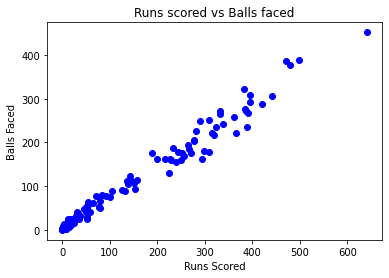

In [ ]:
plt.scatter(runs, balls, c ="blue")
plt.xlabel("Runs Scored") 
plt.ylabel("Balls Faced") 
plt.title('Runs scored vs Balls faced')
plt.show() 

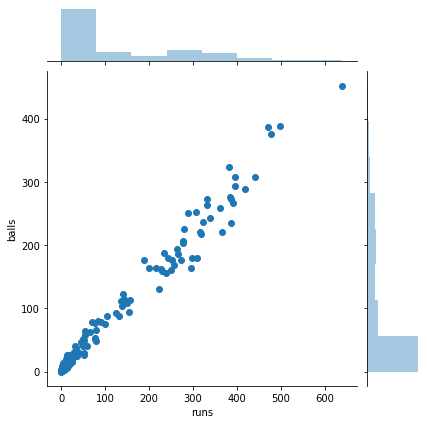

In [ ]:
import seaborn as sns
#rb = sns.load_dataset("rb")
g = sns.jointplot(x="runs", y="balls",data = rb)

### **Finding the best hitter/ striker**
* Creating a new calculated column called **boundary_contribution**. It is calculated as : **(total runs made in 4s + 6s)/(total runs scored)**
* Then creating a scatter-plot between **boundary_contribution** and **strike_rate** where each dot will represent an innings by a batsman
* Aggregate **boundary_contribution** by player and then I have listed down **top 10** players by boundary_contribution across all seasons
---------------------------------

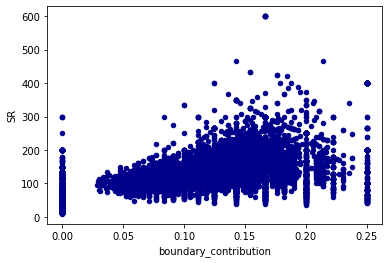

In [ ]:
# write your code here. Feel free to add multiple cells as per your need
batting['boundary_contribution'] = ((batting['fours'] + batting['sixes'])/batting['R'])
a = batting.plot.scatter(x='boundary_contribution',
                      y='SR',
                      c='DarkBlue')


In [ ]:
s0 = (batting.groupby(["batsmen"])['boundary_contribution'].sum())
s0 = s0.sort_values(ascending=False)
top10BC = s0.head(10)
top10BC

batsmen
SK Raina      20.137846
RV Uthappa    19.642338
S Dhawan      19.483546
V Kohli       18.559622
RG Sharma     18.349718
CH Gayle      17.690974
G Gambhir     16.656673
SR Watson     16.126717
KD Karthik    16.010834
PA Patel      15.604900
Name: boundary_contribution, dtype: float64

### **Finding the batsmen with best strike rate**
* Also I have Plotted the top 10 batsmen on a **bar chart**
* Repeated the task for **bottom 10** batsmen
* Creted three box plots as follows:
  * Box plot of **strike rates** of the top 10 batsmen listed 
  * Box plot of **runs scored** of the top 10 batsmen
  * Box plot of **boundary_contribution** of the top 10 batsmen <br>

We thus find this is not a good parameter to measure the hitting ability of a player as there are lower order batsmen or bowlers who have lost their wicket just after hitting a six on the first ball


----------------------------------

In [ ]:
# write your code here. Feel free to add multiple cells as per your need
#batting['boundary_contribution'] = ((batting['fours'] + batting['sixes'])/batting['R'])
s0 = (batting.groupby(["batsmen"])['boundary_contribution'].sum())
top10BC = s0.head(10)
s1 = (batting.groupby(["batsmen"])['R'].sum())
top10R = s1.head(10)
s2 = (batting.groupby(["batsmen"])['B'].sum())
s3 = (s1/s2)*100
s3 = s3.sort_values(ascending=False)
top10SR = s3.head(10)
bottom10SR = s3.tail(10)

In [ ]:
top10SR

batsmen
B Stanlake       250.000000
Umar Gul         205.263158
RS Sodhi         200.000000
AD Russell       186.418109
LJ Wright        176.666667
Shahid Afridi    176.086957
I Malhotra       175.000000
K Gowtham        173.493976
SM Curran        172.727273
SN Thakur        171.428571
dtype: float64

In [ ]:
bottom10SR

batsmen
L Ablish          0.0
KK Ahmed          0.0
JL Denly          0.0
IC Pandey         0.0
V Pratap Singh    0.0
U Kaul            0.0
A Nel             NaN
BW Hilfenhaus     NaN
C Ganapathy       NaN
TP Sudhindra      NaN
dtype: float64

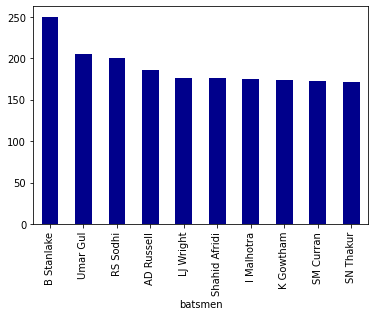

In [ ]:
bar = top10SR.plot.bar(x='batsmen',
                      y='SR',
                      color=['darkblue'])
plt.show()

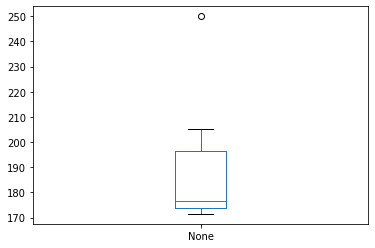

In [ ]:
top10SR.plot.box()

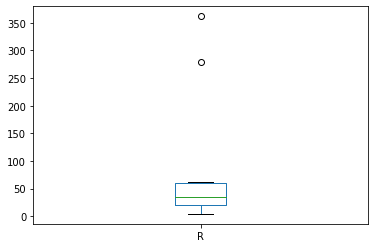

In [ ]:
top10R.plot.box()

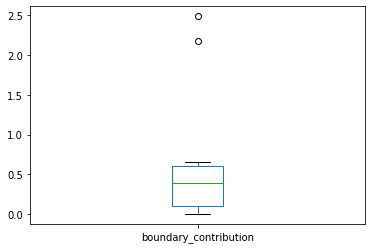

In [ ]:
top10BC.plot.box()

### **Finding the dismissal status of batsmen**
* Creating a new column called **dismissal_status**. There is a column called 'wicket_status' which can be used to extract values like **caught, lbw, bowled** etc. and store in dismissal_status column
* Extracting the bowler name from the column **wicket_status** and storing in a new column called **bowler_name**
* Extracing fielder name from the **wicket_status** column and storing in a new column called **fielder_name**
* Creating a new column called **fielder_involved**. We will set it to 1 if a fielder was involved in the dismissal else 0
* Creating a **count plot** of player dismissals across the categories calculated above. Lets find out which category stands out from the rest!
------------------


In [ ]:
# write your code here. Feel free to add multiple cells as per your need
import re
r = re.compile(r'(?<=b)\s\w+\b')
r0 = re.compile(r'(?<=c)\s\w+\b')
r1 = re.compile("\Ac")
r2 = re.compile("\Ab")
r3 = re.compile("\Arun")
r4 = re.compile("\Anot")
r5 = re.compile(r'(?<=run out)\s[(]\w+\b[)]')

In [ ]:
batting['dismissal_status'] = np.where(batting['wicket_status'].str.contains(r1),'caught',
                                       (np.where(batting['wicket_status'].str.contains(r2),'bowled',
                                                 (np.where(batting['wicket_status'].str.contains(r3),'run out',
                                                           (np.where(batting['wicket_status'].str.contains(r4),'not out','')))))))

In [ ]:
batting['bowler_name'] = np.where(batting['wicket_status'].str.contains(r),batting['wicket_status'].str.findall(r),'nan')
batting['fielder_name'] = np.where(batting['wicket_status'].str.contains(r0),batting['wicket_status'].str.findall(r0),
                                   (np.where(batting['wicket_status'].str.contains(r5),batting['wicket_status'].str.findall(r5),'nan')))                                   
batting['fielder_involved'] = np.where(batting['fielder_name'] == 'nan',0,1 )

In [ ]:
batting.head()

,match_no,team_1,team_2,batsmen,wicket_status,R,B,M,fours,sixes,SR,special_role,match_date,match_key,year,boundary_contribution,dismissal_status,bowler_name,fielder_name,fielder_involved
0,1,Mumbai Indians,Chennai Super Kings,ST Jayasuriya,c Hayden b Thushara,26,20,0,5,0,130.00,normal player,18-04-2009,2009041801,2009,0.192308,caught,[ Thushara],[ Hayden],1
1,1,Mumbai Indians,Chennai Super Kings,SR Tendulkar,not out,59,49,0,7,0,120.40,captain,18-04-2009,2009041801,2009,0.118644,not out,nan,nan,0
2,1,Mumbai Indians,Chennai Super Kings,S Dhawan,c Dhoni b Gony,22,21,0,2,0,104.76,normal player,18-04-2009,2009041801,2009,0.090909,caught,[ Gony],[ Dhoni],1
3,1,Mumbai Indians,Chennai Super Kings,JP Duminy,c & b Gony,9,7,0,1,0,128.57,normal player,18-04-2009,2009041801,2009,0.111111,caught,[ Gony],nan,0
4,1,Mumbai Indians,Chennai Super Kings,DJ Bravo,c Hayden b Joginder Sharma,5,4,0,1,0,125.00,normal player,18-04-2009,2009041801,2009,0.200000,caught,[ Joginder],[ Hayden],1


In [ ]:
batting['is_out'] = np.where(batting['dismissal_status'] == 'not out',1,0 )

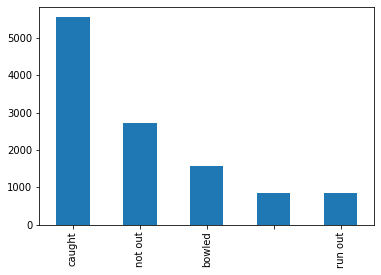

In [ ]:
count_list = batting['dismissal_status'].value_counts()
count_list.plot.bar()

##### As we see, most batsmen have been caught out. This is due to the fact that Twenty20 is a fast paced game and thus in order to take risks, the batsmen might be playing some poor shots which might result into getting caught 


* Now let's create a dataframe at a player level. We will calculate below mentioned metrics :
  * #50s
  * #100s
  * #4s
  * #6s
  * Average
* Also, assign below points to the players based on the above metrics and calculate the total points earned : 
  * 1 half century = **5 points**
  * 1 century = **10 points**
  * 1 four = **2 point**
  * 1 six = **4 points**
  * Average > 30 = **20 points**
  * Average < 30 = **10 points**

* Rank the players based on total points earned. Now list down the top 10 batsmen overall across all IPL seasons

* We will find the most valuable players (batsmen) of this tournament 
------------------


In [ ]:
# write your code here. Feel free to add multiple cells as per your need
d2 = pd.DataFrame()
d2['runs'] = batting['R']
d2 ['batsmen'] = batting['batsmen']
d2['is_out'] = batting['is_out']
d2['50s'] = np.where(batting['R'] >= 50 , 1,0 )
d2['100s'] = np.where(batting['R'] >= 100 , 1,0 )
d2['4s'] =  batting['fours']
d2['6s'] = batting['sixes']

In [ ]:
count_runs = d2.groupby(["batsmen"])['runs'].sum()
a = count_runs.sort_values(ascending=False)
count_fifty = d2.groupby(["batsmen"])['50s'].sum()
b = count_fifty.sort_values(ascending=False)
count_hundred = d2.groupby(["batsmen"])['100s'].sum()
c = count_hundred.sort_values(ascending=False)
count_fours = d2.groupby(["batsmen"])['4s'].sum()
d = count_fours.sort_values(ascending=False)
count_sixes = d2.groupby(["batsmen"])['6s'].sum()
e = count_sixes.sort_values(ascending=False)
count_dismissed = d2.groupby(["batsmen"])['is_out'].sum()
f = count_dismissed.sort_values(ascending=False)

In [ ]:
d3 = pd.DataFrame({'count_runs': a, 'count_fifty': b, 'count_hundred': c,'count_fours': d, 'count_sixes': e, 'count_dismissed': f})
d3['avg'] = d3['count_runs']/d3['count_dismissed']
d3.loc[~np.isfinite(d3['avg']), 'avg'] = d3['count_runs']
d3['pt'] = np.where(d3['avg'] >=30, 20, 10)
d3['points'] = ((d3['count_fifty']*5) + (d3['count_hundred']*10) + (d3['count_fours']*2) + (d3['count_sixes']*4) + (d3['pt']))

In [ ]:
(d3.sort_values('points', ascending= False)).head(10)

,count_runs,count_fifty,count_hundred,count_fours,count_sixes,count_dismissed,avg,pt,points
CH Gayle,4484,34,6,368,326,15,298.933333,20,2290
V Kohli,5412,41,5,480,190,26,208.153846,20,1995
SK Raina,5368,39,1,493,194,28,191.714286,20,1987
DA Warner,4706,48,4,458,181,17,276.823529,20,1940
RG Sharma,4898,37,1,431,194,28,174.928571,20,1853
AB de Villiers,4395,36,3,357,212,32,137.343750,20,1792
S Dhawan,4579,37,0,524,96,20,228.950000,20,1637
RV Uthappa,4411,24,0,435,156,17,259.470588,20,1634
SR Watson,3575,23,4,343,177,15,238.333333,20,1569
MS Dhoni,4432,23,0,297,209,65,68.184615,20,1565


Please note that this data does not take into account whether the player is playing or has retired.
Thus, the above list reflects some of the most consistent and best players since the inception of IPL

### **Highest score of a Captain in IPL**
* Look for a column called **Special_role** to denote if a player is captain or not. 
* **Filter** the dataframe based on if a player is a captain.
* Pick all the innings by the captains (For **IPL 2019**) 
------------------


In [ ]:
# write your code here. Feel free to add multiple cells as per your need
deliveries['match_key'] = deliveries['Match_id']
m = deliveries.groupby(['match_key','Innings'])
q = m['Runs_total'].sum()
d5 = (batting.loc[batting['special_role'] == 'captain'])
df1 = pd.DataFrame(q)
m1 = d5.groupby(['match_key','R'])
q1 = m1['R'].sum()
df2 = pd.DataFrame(q1)

In [ ]:
df3 = df2.merge(df1, on='match_key')
df3['percent contribution'] = (df3['R']/df3['Runs_total'])*100 
df3.sort_values('percent contribution', ascending= False).head(10)

,R,Runs_total,percent contribution
match_key,,,
2015051701,67,2,3350.000000
2017043002,126,67,188.059701
2017043002,126,68,185.294118
2016051401,109,104,104.807692
2016051801,113,120,94.166667
2011050502,119,139,85.611511
2011041701,66,81,81.481481
2010041102,89,111,80.180180
2010041102,89,112,79.464286


### **Let's find out the following**
* Is IPL more in favor of batsmen?
* Let's consider two metrics **total_runs** made in a match and the **run_rate** of the match
* Creating a **histogram** of **total_runs** by match. We can say that total runs has a slight tail on the left. Thus it is slightly Left Skewed.
* **Repeating** the above step for **run_rate** per match too
We find the following
------------------

In [ ]:
# write your code here. Feel free to add multiple cells as per your need
a1 = deliveries.groupby(['match_key','Innings'])
total = a1['Runs_total'].sum()
run_rate = (total/120)*6

In [ ]:
total

match_key   Innings
2008041801  1          222
            2           82
2008041901  1          240
            2          207
2008041902  1          129
                      ... 
2017051701  2           48
2017051901  1          107
            2          111
2017052101  1          129
            2          128
Name: Runs_total, Length: 1268, dtype: int64

In [ ]:
run_rate

match_key   Innings
2008041801  1          11.10
            2           4.10
2008041901  1          12.00
            2          10.35
2008041902  1           6.45
                       ...  
2017051701  2           2.40
2017051901  1           5.35
            2           5.55
2017052101  1           6.45
            2           6.40
Name: Runs_total, Length: 1268, dtype: float64

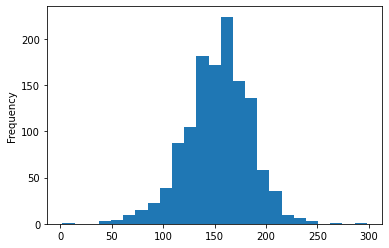

In [ ]:
total.plot.hist(bins=25)

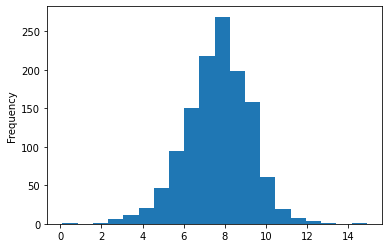

In [ ]:
run_rate.plot.hist(bins =20)

### Creating a DatFrame for CSK in IPL 2014

In [ ]:
# write your code here. Feel free to add multiple cells as per your need
new_df = pd.DataFrame()
new_df = deliveries[deliveries['Team'] == 'Chennai Super Kings']
new_df['year'] = new_df.Match_id.astype(str).str[:4].astype(int)
new_df['year'] = new_df[new_df['year'] == 2014]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
new_df = new_df[new_df['year'].notna()]
new_df['year'] = new_df['year'].astype(int)
new_df['year'] = new_df.Match_id.astype(str).str[:4].astype(int)

In [ ]:
a2 = new_df.groupby(['match_key','Innings'])
total_csk = a2['Runs_total'].sum()
total_csk

match_key   Innings
2014041802  1          205
2014042101  1          177
2014042301  1          140
2014042502  2          142
2014042701  2          146
2014050201  1          148
2014050502  2          181
2014050701  2          187
2014051001  2          160
2014051302  2          149
2014051801  1          138
2014052002  1          154
2014052201  1          185
2014052402  2          160
2014052801  2          176
2014053001  2          202
Name: Runs_total, dtype: int64

In [ ]:
run_rate_csk = (total_csk/120)*6
run_rate_csk

match_key   Innings
2014041802  1          10.25
2014042101  1           8.85
2014042301  1           7.00
2014042502  2           7.10
2014042701  2           7.30
2014050201  1           7.40
2014050502  2           9.05
2014050701  2           9.35
2014051001  2           8.00
2014051302  2           7.45
2014051801  1           6.90
2014052002  1           7.70
2014052201  1           9.25
2014052402  2           8.00
2014052801  2           8.80
2014053001  2          10.10
Name: Runs_total, dtype: float64

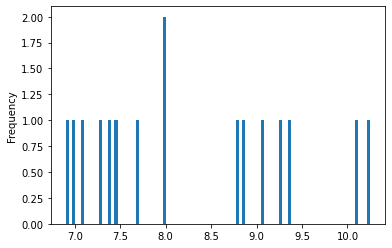

In [ ]:
run_rate_csk.plot.hist(bins = 100)

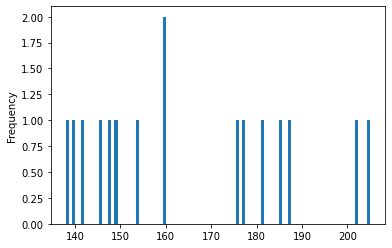

In [ ]:
total_csk.plot.hist(bins = 100)

### Now for all teams of IPL 2014

In [ ]:
new_df_1 = pd.DataFrame()
new_df_1 = deliveries[deliveries['year'] == 2014]
new_df_1

,Match_id,City,Innings,Winner,Team,Over,Delivery,Batsman,Bowler,non_striker,runs_batsman,runs_extras,extras_type,Runs_total,player_out,mode_of_dismissal,fielders_involved,file_name,match_key,year
1591,2014041901,NaN,1,Royal Challengers Bangalore,Mumbai Indians,1,0.1,MEK Hussey,MA Starc,AP Tare,1,0,NaN,1,NaN,NaN,NaN,729287.yaml,2014041901,2014
1592,2014041901,NaN,1,Royal Challengers Bangalore,Mumbai Indians,1,0.2,AP Tare,MA Starc,MEK Hussey,1,0,NaN,1,NaN,NaN,NaN,729287.yaml,2014041901,2014
1593,2014041901,NaN,1,Royal Challengers Bangalore,Mumbai Indians,1,0.3,MEK Hussey,MA Starc,AP Tare,2,0,NaN,2,NaN,NaN,NaN,729287.yaml,2014041901,2014
1594,2014041901,NaN,1,Royal Challengers Bangalore,Mumbai Indians,1,0.4,MEK Hussey,MA Starc,AP Tare,0,0,NaN,0,NaN,NaN,NaN,729287.yaml,2014041901,2014
1595,2014041901,NaN,1,Royal Challengers Bangalore,Mumbai Indians,1,0.5,MEK Hussey,MA Starc,AP Tare,4,0,NaN,4,NaN,NaN,NaN,729287.yaml,2014041901,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149489,2014050702,Delhi,2,Kolkata Knight Riders,Kolkata Knight Riders,18,17.4,JH Kallis,WD Parnell,MK Pandey,0,0,NaN,0,NaN,NaN,NaN,733985.yaml,2014050702,2014
149490,2014050702,Delhi,2,Kolkata Knight Riders,Kolkata Knight Riders,18,17.5,JH Kallis,WD Parnell,MK Pandey,4,0,NaN,4,NaN,NaN,NaN,733985.yaml,2014050702,2014
149491,2014050702,Delhi,2,Kolkata Knight Riders,Kolkata Knight Riders,18,17.6,JH Kallis,WD Parnell,MK Pandey,1,0,NaN,1,NaN,NaN,NaN,733985.yaml,2014050702,2014
149492,2014050702,Delhi,2,Kolkata Knight Riders,Kolkata Knight Riders,19,18.1,JH Kallis,S Nadeem,MK Pandey,4,0,NaN,4,NaN,NaN,NaN,733985.yaml,2014050702,2014


In [ ]:
new_df_1 = new_df_1[new_df_1['year'].notna()]
new_df_1['year'] = new_df_1['year'].astype(int)
new_df_1['year'] = new_df_1.Match_id.astype(str).str[:4].astype(int)

In [ ]:
a3 = new_df_1.groupby(['match_key','Innings'])
total_2014 = a3['Runs_total'].sum()
total_2014

match_key   Innings
2014041601  1          163
            2          122
2014041701  1          145
            2          146
2014041801  1          133
                      ... 
2014052801  2          176
2014053001  1          226
            2          202
2014060101  1          199
            2          200
Name: Runs_total, Length: 120, dtype: int64

In [ ]:
run_rate_2014 = (total_2014/120)*6
run_rate_2014

match_key   Innings
2014041601  1           8.15
            2           6.10
2014041701  1           7.25
            2           7.30
2014041801  1           6.65
                       ...  
2014052801  2           8.80
2014053001  1          11.30
            2          10.10
2014060101  1           9.95
            2          10.00
Name: Runs_total, Length: 120, dtype: float64

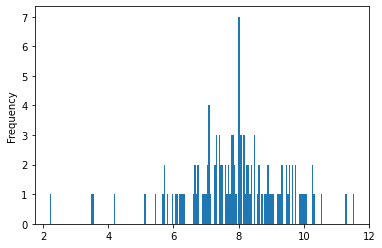

In [ ]:
run_rate_2014.plot.hist(bins = 200)

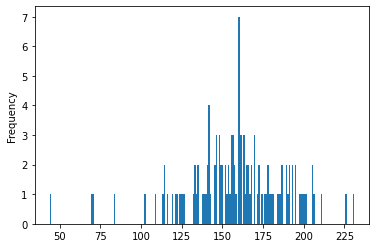

In [ ]:
total_2014.plot.hist(bins = 200)

We thus find that the median Run Rate is around 8.0 and the median score is near 165. <br>
We can confidently say that CSK follows the trend and can be thus considered a competitive team

---------------------------

* Let usCalculate a metric **%fast_innings**. This would be percentage of innings where run_rate is more than base_line run rate of **6.0 per over**
    * Listing the teams that are the top 3 teams by **%fast_innings**?
    
* Let's now think of how **fast** or **slow** the run was made.
  * We will create a metric which would be an indicator of speed. Let's create a metric called **dist_base_line** which means **innings_run_rate - 6.0**.
  * A **negative** value would mean slow run_rate and **positive** would mean fast. The value would mean the **intensity**. (We can say a value of 3.6-6 = -2.4 means a very slow run rate. Which a value of 10.2-6 = 3.6 as a very fast run rate)
  * For a team, we will also visualize the distribution of negative values and do the same for positive ones. 
  * Alos let us create a **scatter-plot** with **runs_made** on x-axis and **run_rate** on y-axis. 
---------------------------

In [ ]:
# write your code here. Feel free to add multiple cells as per your need
a5 = deliveries.groupby(['Match_id','Team'])
total = a5['Runs_total'].sum()
run_rate = (total/120)*6
percent_fast = run_rate - 6
percent_fast['team'] = deliveries['Team']
percent_fast = pd.DataFrame(percent_fast)
percent_fast.reset_index()
percent_fast['Runs_total']
#percent_fast.dtypes
#percent_fast.sort_values('Runs_total', ascending= False)

Match_id    Team                       
2008041801  Kolkata Knight Riders                                                        5.1
            Royal Challengers Bangalore                                                 -1.9
2008041901  Chennai Super Kings                                                            6
            Kings XI Punjab                                                             4.35
2008041902  Delhi Daredevils                                                             0.6
                                                                 ...                        
2017051901  Kolkata Knight Riders                                                      -0.65
            Mumbai Indians                                                             -0.45
2017052101  Mumbai Indians                                                              0.45
            Rising Pune Supergiant                                                       0.4
team                          

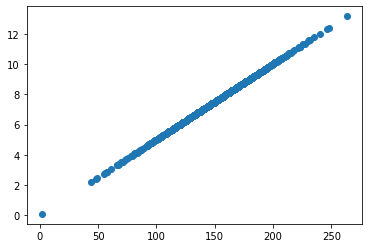

In [ ]:
plt.scatter(total,run_rate)

Thus, we can say that higher run rate corresponds to a higher total

### **Question 13**
* Let's analyze whether higher run_rate lead to victory?
* Create a visualization to analyze run_rates of teams in matches which it won against the ones it lost. 
  * We will find if there is a team which is really winning based on a higher run_rate maintained by them
  * Also we will look at the **statistical test of significance** which can help us evaluate the hypothesis mentioned before.
    

------------------

[[PointbiserialrResult(correlation=0.4173836059744675, pvalue=7.986091515558e-08),
  'Mumbai Indians'],
 [PointbiserialrResult(correlation=0.4102001431025227, pvalue=2.471149219464152e-07),
  'Royal Challengers Bangalore'],
 [PointbiserialrResult(correlation=0.29543984845110904, pvalue=0.0002942783241613565),
  'Kolkata Knight Riders'],
 [PointbiserialrResult(correlation=0.3951449152962164, pvalue=7.978363481874576e-07),
  'Kings XI Punjab'],
 [PointbiserialrResult(correlation=0.4946349494133604, pvalue=3.932385164981009e-10),
  'Delhi Daredevils'],
 [PointbiserialrResult(correlation=0.3798106974455861, pvalue=9.789388788107247e-06),
  'Chennai Super Kings'],
 [PointbiserialrResult(correlation=0.349613125307158, pvalue=0.0001042256516409135),
  'Rajasthan Royals'],
 [PointbiserialrResult(correlation=0.28163708671080057, pvalue=0.014371037691308434),
  'Deccan Chargers'],
 [PointbiserialrResult(correlation=0.2443130214436971, pvalue=0.038617663275303415),
  'Sunrisers Hyderabad'],
 [Poi

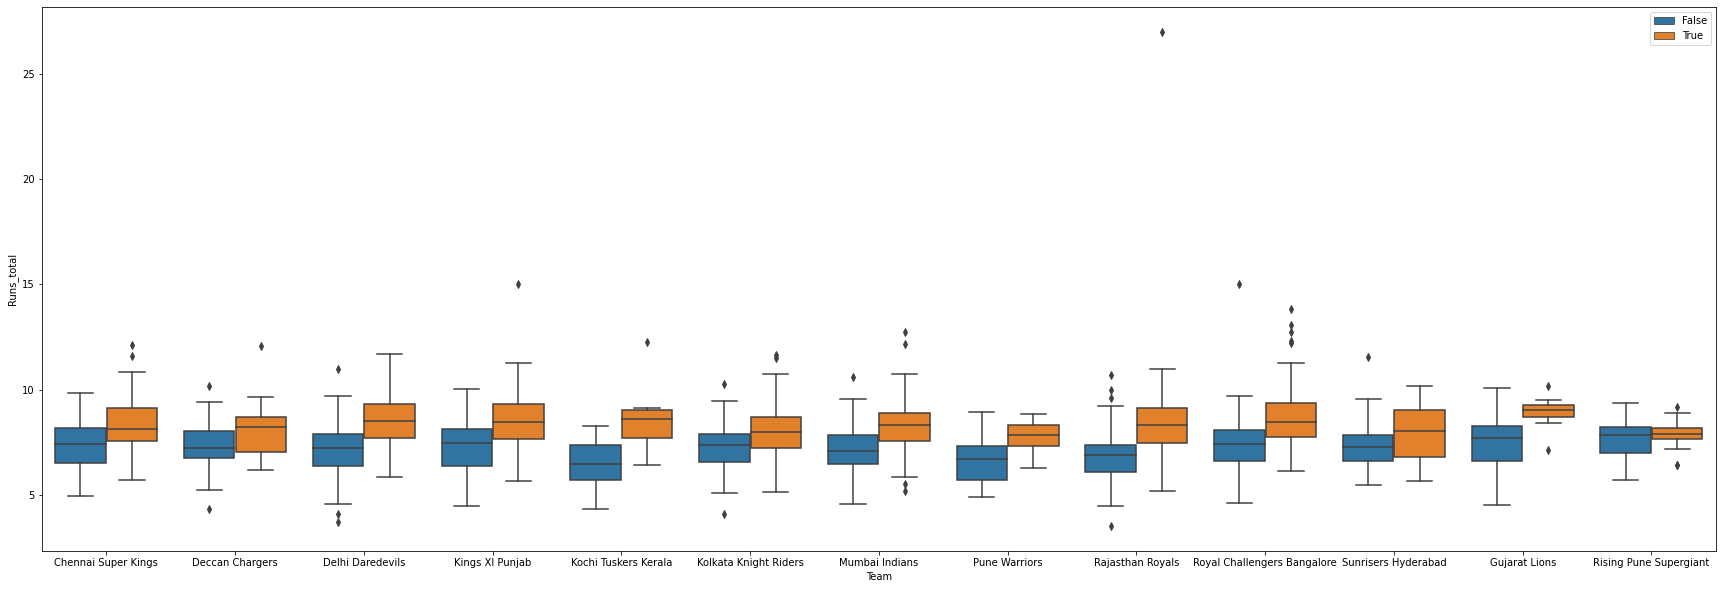

In [ ]:
# write your code here. Feel free to add multiple cells as per your need
#deliveries = pd.read_csv('/content/drive/My Drive/data/ipl_deliveries.csv')
import seaborn as sns
runs_balls = 6*deliveries[['Winner','Team','Runs_total','City','Match_id','Innings']].groupby(['Winner','Team','City','Match_id','Innings']).sum()/deliveries[['Winner','Team','Runs_total','City','Match_id','Innings']].groupby(['Winner','Team','City','Match_id','Innings']).count()
histogram_runrate = runs_balls.reset_index()[['Winner','Runs_total','Team','Match_id']]
#histogram_runrate['Runs_total'] = histogram_runrate['run_rate']
rr_team = histogram_runrate.reset_index()
rr_team['Team'] = ['Rising Pune Supergiant' if x == 'Rising Pune Supergiants' else x for x in rr_team['Team']]
rr_team['Winner'] = ['Rising Pune Supergiant' if x == 'Rising Pune Supergiants' else x for x in rr_team['Winner']]
rr_team['dist_base_line'] = rr_team['Runs_total'] - 6.0

rr_winners = rr_team[rr_team['Winner'] == rr_team['Team']]
rr_losers = rr_team[rr_team['Winner'] != rr_team['Team']]

plt.figure(figsize=(30, 10))
sns.boxplot(x = rr_team['Team'], y =rr_team['Runs_total'], hue = rr_team['Winner'] == rr_team['Team'])

team_list = list(rr_team['Team'].value_counts().index)

from scipy.stats import pointbiserialr

pbc_array = []

for i in team_list:
  rr_some_team = rr_team[rr_team['Team'] == i]   
  run_rate = rr_some_team['Runs_total']
  wins = (rr_some_team['Winner'] == rr_some_team['Team'])

  pbc = pointbiserialr(run_rate, wins)
  pbc_array.append([pbc,i])

pbc_array

### **VK**
* **Virat Kohli** is known to be a **master chaser**. Is it so? Let's validate through raw data
* First we will visualize the runs made by Virat Kohli in matches where his team played the **1st innings** 
* Also let us visualize the runs made by Virat Kohli in matches where his team played the **2nd innings**. 
* There is a lot of overlap in both of the histograms as seen below
* I have also plotted the two histograms for the matches which his team won and two histograms for the matches which his team lost

* Let;s find whether Kohli has been a great chaser **only** in matches won?
* Calculating Kohli's **run contribution(%)** for all matches played by him
  * Drawing a violin plot of his **run_contribution(%)** for two categories : 
    * Matches **won** by his team
    * Matches **lost** by his team
  

In [ ]:
# write your code here. Feel free to add multiple cells as per your need
first = deliveries[deliveries['Batsman'] == 'V Kohli']
first_Innings = first[first['Innings'] == 1]
FI = first_Innings.groupby(['match_key'])['Runs_total'].sum()
second = deliveries[deliveries['Batsman'] == 'V Kohli']
second_Innings = second[second['Innings'] == 2]
SI = second_Innings.groupby(['match_key'])['Runs_total'].sum()

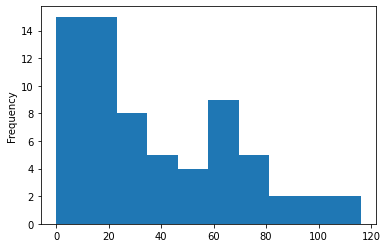

In [ ]:
x = FI.plot.hist()

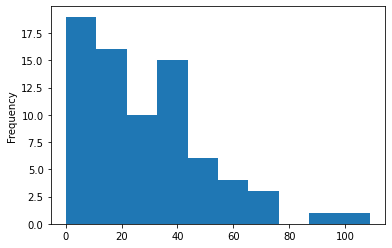

In [ ]:
y = SI.plot.hist()

In [ ]:
first_Innings_winner = first_Innings[first_Innings['Winner'] == 'Royal Challengers Bangalore']
FIW = first_Innings_winner.groupby(['match_key'])['Runs_total'].sum()

In [ ]:
second_Innings_winner = second_Innings[second_Innings['Winner'] == 'Royal Challengers Bangalore']
SIW = second_Innings.groupby(['match_key'])['Runs_total'].sum()

In [ ]:
first_Innings_loser = first_Innings[first_Innings['Winner'] != 'Royal Challengers Bangalore']
FIL = first_Innings_loser.groupby(['match_key'])['Runs_total'].sum()

In [ ]:
second_Innings_loser = second_Innings[second_Innings['Winner'] != 'Royal Challengers Bangalore']
SIL = second_Innings.groupby(['match_key'])['Runs_total'].sum()

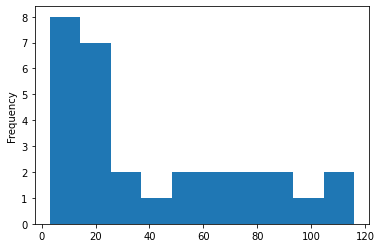

In [ ]:
FIW.plot.hist()

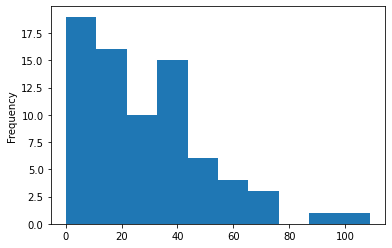

In [ ]:
SIW.plot.hist()

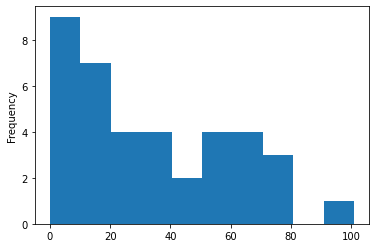

In [ ]:
FIL.plot.hist()

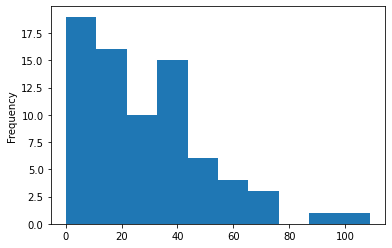

In [ ]:
SIL.plot.hist()

As seen from the above histograms, Virat Kohli performs equally well in chasing despite of the outcome of the team winning or losing.

### Calculating % contribution

In [ ]:
RCB = deliveries[deliveries['Team'] == 'Royal Challengers Bangalore']
Team_total = RCB.groupby(['match_key'])['Runs_total'].sum()
Virat = deliveries[deliveries['Batsman'] == 'V Kohli']
Virat_score = Virat.groupby(['match_key'])['Runs_total'].sum()
percent_contribution = (Virat_score/Team_total)*100
(percent_contribution.sort_values(ascending=False)).head(10)

match_key
2013040901    59.876543
2017042902    57.291667
2016042402    56.111111
2016050702    55.897436
2013051001    55.191257
2016051801    54.976303
2013051801    53.773585
2015051501    53.012048
2011041401    52.112676
2015051701    50.000000
Name: Runs_total, dtype: float64

In [ ]:
RCB_wins = RCB[RCB['Winner'] == 'Royal Challengers Bangalore']
winteam_total = RCB_wins.groupby(['match_key'])['Runs_total'].sum()
Virat_wins = RCB_wins[RCB_wins['Batsman'] == 'V Kohli']
Viratwin_score = Virat_wins.groupby(['match_key'])['Runs_total'].sum()
RCB_losses = RCB[RCB['Winner'] != 'Royal Challengers Bangalore']
lossteam_total = RCB_losses.groupby(['match_key'])['Runs_total'].sum()
Virat_loses = RCB_losses[RCB_losses['Batsman'] == 'V Kohli']
Viratloss_score = Virat_loses.groupby(['match_key'])['Runs_total'].sum()

In [ ]:
win_run_contribution = (Viratwin_score/winteam_total)*100
loss_run_contribution = (Viratloss_score/lossteam_total)*100

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  """Entry point for launching an IPython kernel.


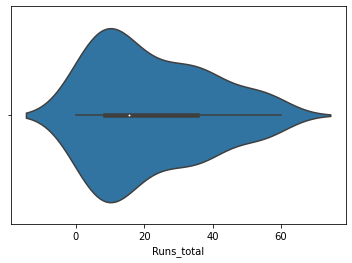

In [ ]:
import pandas.util.testing as tm
import seaborn as sns
sns.violinplot(win_run_contribution)

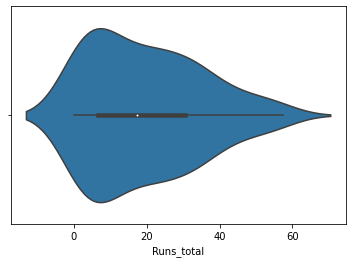

In [ ]:
sns.violinplot(loss_run_contribution)

In [ ]:
RCB = deliveries[deliveries['Team'] == 'Royal Challengers Bangalore']
RCB_wins = RCB[RCB['Winner'] == 'Royal Challengers Bangalore']
Virat_wins = RCB_wins[RCB_wins['Batsman'] == 'V Kohli']
Virat_wins['Strike_Rate'] = batting['SR']
Virat_loses['Strike_Rate'] = batting['SR']
abc = Virat_wins.groupby(['match_key'])['Strike_Rate'].nunique()
abc.sort_values(ascending  = False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


match_key
2014041701    31
2014051801    26
2014041901     2
2017051402     0
2011051101     0
              ..
2013041601     0
2013041102     0
2013040901     0
2013040401     0
2008042002     0
Name: Strike_Rate, Length: 66, dtype: int64

In [ ]:
acb = Virat_loses.groupby(['match_key'])['Strike_Rate'].nunique()
acb.sort_values(ascending  = False)

match_key
2015050401    38
2013042901    23
2010032502    21
2014042401    20
2016043001    16
              ..
2013051202     0
2013050601     0
2013042701     0
2017050501     0
2008041801     0
Name: Strike_Rate, Length: 75, dtype: int64

Thus, we can say that VK has been a great chaser and if he is there till the end of the match, the team he his playing for, will win the match